In [6]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [7]:
print(os.listdir("dataset"))

['Parasitized', 'Uninfected']


In [8]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    "dataset",
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

val_data = datagen.flow_from_directory(
    "dataset",
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

Found 4310 images belonging to 2 classes.
Found 1076 images belonging to 2 classes.


In [9]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    patience=2
)

In [10]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/10


2026-02-26 21:08:08.112870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


135/135 ━━━━━━━━━━━━━━━━━━━━ 35s 217ms/step - accuracy: 0.8387 - loss: 0.3881 - val_accuracy: 0.9015 - val_loss: 0.2699 - learning_rate: 0.0010
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 26s 193ms/step - accuracy: 0.8991 - loss: 0.2610 - val_accuracy: 0.9052 - val_loss: 0.2479 - learning_rate: 0.0010
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 27s 198ms/step - accuracy: 0.9102 - loss: 0.2327 - val_accuracy: 0.9108 - val_loss: 0.2178 - learning_rate: 0.0010
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 27s 196ms/step - accuracy: 0.9181 - loss: 0.2194 - val_accuracy: 0.9238 - val_loss: 0.1997 - learning_rate: 0.0010
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 28s 210ms/step - accuracy: 0.9220 - loss: 0.2088 - val_accuracy: 0.9247 - val_loss: 0.1946 - learning_rate: 0.0010
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 28s 204ms/step - accuracy: 0.9299 - loss: 0.1978 - val_accuracy: 0.9247 - val_loss: 0.1937 - learning_rate: 0.0010
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 26s 195ms/step - accuracy: 0.9306 - loss:

In [11]:
model.save("malaria_model.h5")

In [12]:
model.save("malaria_model.keras")

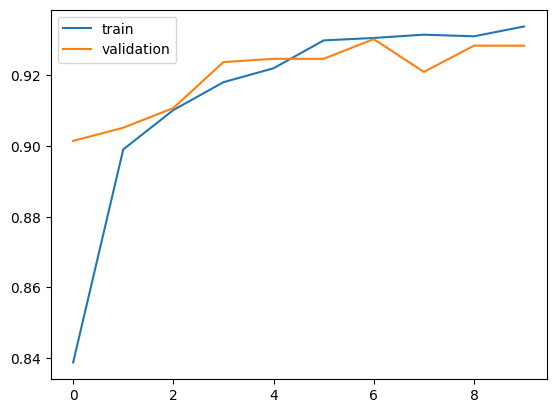

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()